In [1]:
%matplotlib inline
import yfinance as yf
import quantstats as qs
import numpy as np
import pandas as pd
# extend pandas functionality with metrics, etc.
qs.extend_pandas()

In [3]:
tickerSymbols = ["AAPL", "PYPL", "SQ"]

AAPL=yf.Ticker(tickerSymbols[0])

AAPL_df=AAPL.history(period="1D", start="2016-01-01", end="2021-08-28")

In [4]:
AAPL_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-12-31,24.669517,24.674126,24.164645,24.266081,163649200,0.0,0.0
2016-01-04,23.655168,24.291444,23.514542,24.286833,270597600,0.0,0.0
2016-01-05,24.379045,24.402098,23.609059,23.678219,223164000,0.0,0.0
2016-01-06,23.182569,23.599838,23.023501,23.214844,273829600,0.0,0.0
2016-01-07,22.749162,23.083437,22.230459,22.235069,324377600,0.0,0.0


In [5]:
AAPL_df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-08-23,148.309998,150.190002,147.889999,149.710007,60131800,0.0,0.0
2021-08-24,149.449997,150.860001,149.149994,149.619995,48606400,0.0,0.0
2021-08-25,149.809998,150.320007,147.800003,148.360001,58991300,0.0,0.0
2021-08-26,148.350006,149.119995,147.509995,147.539993,48597200,0.0,0.0
2021-08-27,147.479996,148.750000,146.830002,148.600006,55721500,0.0,0.0


In [4]:
appl_pct = AAPL_df[["Close"]].pct_change()

In [5]:
appl_pct.dropna(inplace=True)

In [6]:
appl_pct

,Close
Date,
1980-12-15,-0.052171
1980-12-16,-0.073398
1980-12-17,0.024751
1980-12-18,0.028992
1980-12-19,0.061029
...,...
2021-08-16,0.013548
2021-08-17,-0.006154
2021-08-18,-0.025501


In [7]:
appl_pct = appl_pct.iloc[:, 0]

In [8]:
appl_pct

Date
1980-12-15   -0.052171
1980-12-16   -0.073398
1980-12-17    0.024751
1980-12-18    0.028992
1980-12-19    0.061029
                ...   
2021-08-16    0.013548
2021-08-17   -0.006154
2021-08-18   -0.025501
2021-08-19    0.002323
2021-08-20    0.010157
Name: Close, Length: 10259, dtype: float64

In [9]:
type(appl_pct)

pandas.core.series.Series

In [10]:
qs.stats.sharpe(appl_pct)

0.6263970578520507

In [11]:
# fetch the daily returns for a stock
stock = qs.utils.download_returns('AAPL')

# show sharpe ratio
qs.stats.sharpe(stock)

0.626826390362796

In [12]:
type(stock)

pandas.core.series.Series

In [13]:
stock

Date
1980-12-12         NaN
1980-12-15   -0.052171
1980-12-16   -0.073398
1980-12-17    0.024751
1980-12-18    0.028992
                ...   
2021-08-18   -0.025501
2021-08-19    0.002323
2021-08-20    0.010157
2021-08-23    0.010257
2021-08-24   -0.000601
Name: Close, Length: 10262, dtype: float64

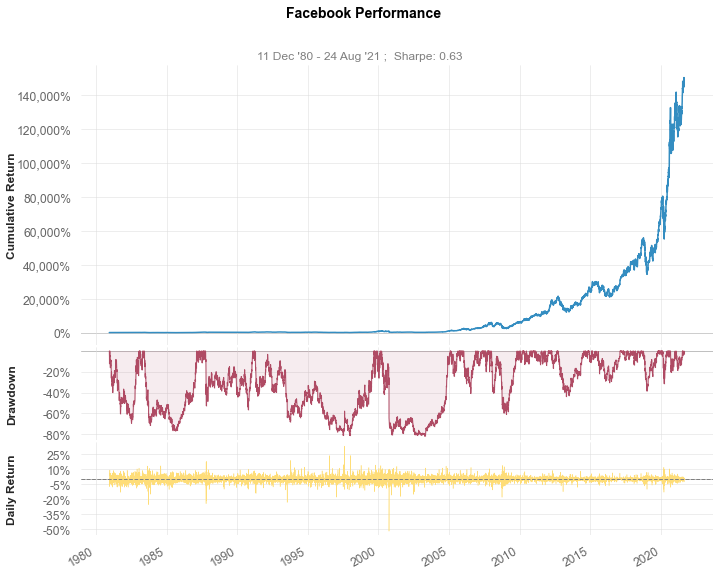

In [14]:
qs.plots.snapshot(stock, title='Facebook Performance')


In [15]:
qs.reports.html(stock, "FB")

In [16]:
industry_stocks = {'Materials': ['BHP.AX',
  'FMG.AX','ABBV','PFE','BAC','COKE','SQ','AAPL','AMD','FDX','EBAY','AMZN','C','F','GDX','USO'
  ]}

In [17]:
stock_list = []

for ind in industry_stocks.values():
    stock_list.extend(ind)

In [18]:
stock_list[0]

'BHP.AX'

In [19]:
stock_dr = {}

# fetch the daily returns for each stock
for stock in stock_list:
    stock_dr[stock] = qs.utils.download_returns(stock)

In [20]:
stock_dr.items()

dict_items([('BHP.AX', Date
1988-02-01         NaN
1988-03-01    0.002994
1988-04-01    0.134328
1988-04-25    0.024956
1988-04-26    0.000000
                ...   
2021-08-19   -0.063522
2021-08-20   -0.007387
2021-08-23    0.002706
2021-08-24    0.010346
2021-08-25    0.012467
Name: Close, Length: 5909, dtype: float64), ('FMG.AX', Date
1999-07-26         NaN
1999-07-27    0.000000
1999-07-28    0.000000
1999-07-29    0.100062
1999-07-30    0.000000
                ...   
2021-08-19   -0.061539
2021-08-20    0.011426
2021-08-23   -0.042731
2021-08-24    0.013853
2021-08-25    0.026316
Name: Close, Length: 5138, dtype: float64), ('ABBV', Date
2013-01-02         NaN
2013-01-03   -0.008257
2013-01-04   -0.012633
2013-01-07    0.002035
2013-01-08   -0.021764
                ...   
2021-08-18   -0.019806
2021-08-19    0.005457
2021-08-20    0.007547
2021-08-23    0.004545
2021-08-24    0.002681
Name: Close, Length: 2177, dtype: float64), ('PFE', Date
1972-06-01         NaN
1972-06-02   -0

In [21]:
stock_bhp = stock_dr['BHP.AX'].loc['2020-01-01':]
stock_fmg = stock_dr['FMG.AX'].loc['2020-01-01':]
stock_abbv = stock_dr['ABBV'].loc['2020-01-01':]
stock_pfe = stock_dr['PFE'].loc['2020-01-01':]
stock_bac = stock_dr['BAC'].loc['2020-01-01':]
stock_coke = stock_dr['COKE'].loc['2020-01-01':]
stock_sq = stock_dr['SQ'].loc['2020-01-01':]
stock_aapl = stock_dr['AAPL'].loc['2020-01-01':]
stock_amd = stock_dr['AMD'].loc['2020-01-01':]
stock_fdx = stock_dr['FDX'].loc['2020-01-01':]
stock_ebay = stock_dr['EBAY'].loc['2020-01-01':]
stock_amzn = stock_dr['AMZN'].loc['2020-01-01':]
stock_c = stock_dr['C'].loc['2020-01-01':]
stock_f = stock_dr['F'].loc['2020-01-01':]
stock_gdx = stock_dr['GDX'].loc['2020-01-01':]
stock_uso = stock_dr['USO'].loc['2020-01-01':]


In [25]:
df=pd.concat([stock_bhp,stock_fmg,stock_abbv,stock_pfe,stock_bac,stock_coke,stock_sq,stock_aapl,stock_amd,
             stock_fdx,stock_ebay,stock_amzn,stock_c,stock_f,stock_gdx,stock_uso],axis=1)
df.columns=['BHP.AX','FMG.AX','ABBV','PFE','BAC','COKE','SQ','AAPL','AMD','FDX','EBAY','AMZN','C','F','GDX','USO']
df

,BHP.AX,FMG.AX,ABBV,PFE,BAC,COKE,SQ,AAPL,AMD,FDX,EBAY,AMZN,C,F,GDX,USO
Date,,,,,,,,,,,,,,,,
2020-01-02,0.000771,0.008419,0.011407,-0.001021,0.011925,-0.005809,0.020301,0.022816,0.070650,0.025726,0.005262,0.027151,0.016773,0.012903,0.002391,0.000000
2020-01-03,0.005135,-0.002783,-0.009492,-0.005365,-0.020763,0.011898,-0.013003,-0.009722,-0.010183,-0.012379,-0.009366,-0.012139,-0.018836,-0.022293,-0.006133,0.028884
2020-01-06,0.006386,0.001860,0.007892,-0.001284,-0.001433,-0.013123,-0.006825,0.007968,-0.004321,0.000783,-0.005006,0.014886,-0.003137,-0.005429,0.001714,-0.001517
2020-01-07,0.003807,-0.007428,-0.005705,-0.003344,-0.006600,-0.010106,0.032284,-0.004703,-0.002893,0.009785,-0.004472,0.002092,-0.008685,0.009825,0.009583,-0.002280
2020-01-08,0.000506,-0.004677,0.007087,0.008000,0.010110,-0.006806,0.046602,0.016086,-0.008705,0.015052,-0.000562,-0.007809,0.007618,0.000000,-0.038983,-0.035796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-19,-0.063522,-0.061539,0.005457,-0.010343,-0.014710,-0.003641,-0.008896,0.002323,0.002513,-0.019064,0.000000,-0.004208,-0.017998,-0.025385,-0.016831,-0.013877
2021-08-20,-0.007387,0.011426,0.007547,-0.001639,0.004479,0.010712,0.022149,0.010157,0.009161,-0.003775,0.007277,0.003827,0.005871,-0.007893,-0.003553,-0.029931
2021-08-23,0.002706,-0.042731,0.004545,0.024836,0.013376,-0.002494,0.028094,0.010257,0.039369,0.001313,-0.002181,0.020600,0.009110,0.012729,0.041167,0.055722


In [ ]:
Stock_main= 

In [22]:
stock_bhp.tail()

Date
2021-08-19   -0.063522
2021-08-20   -0.007387
2021-08-23    0.002706
2021-08-24    0.010346
2021-08-25    0.012467
Name: Close, dtype: float64

In [ ]:
list_of_stocks = ['BHP.AX','FMG.AX','ABBV','PFE','BAC','COKE','SQ','AAPL','AMD','FDX','EBAY','AMZN','C','F','GDX','USO']

close_price_List = []
for i in list_of_stocks:
    your code to get close price
    close_price_list.append(close_price)

In [23]:
stock_bhp = pd.DataFrame(stock_bhp)
stock_bhp.rename(columns={'Close':'CLOSE_BHP'},inplace=True)

stock_fmg = pd.DataFrame(stock_fmg)
stock_fmg.rename(columns={'Close':'CLOSE_FMG'},inplace=True)

In [24]:
main_df = pd.merge(stock_bhp,stock_fmg,left_index=True,right_index=True)

In [25]:
main_df

,CLOSE_BHP,CLOSE_FMG
Date,,
2020-01-02,0.000771,0.008419
2020-01-03,0.005135,-0.002783
2020-01-06,0.006386,0.001860
2020-01-07,0.003807,-0.007428
2020-01-08,0.000506,-0.004677
...,...,...
2021-08-19,-0.063522,-0.061539
2021-08-20,-0.007387,0.011426
2021-08-23,0.002706,-0.042731


In [26]:
stock_bhp.T

Date,2020-01-02,2020-01-03,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,2020-01-13,2020-01-14,2020-01-15,...,2021-08-12,2021-08-13,2021-08-16,2021-08-17,2021-08-18,2021-08-19,2021-08-20,2021-08-23,2021-08-24,2021-08-25
CLOSE_BHP,0.000771,0.005135,0.006386,0.003807,0.000506,0.011625,-0.003247,-0.009273,0.013155,0.003246,...,0.008949,-0.003397,-0.014013,-0.014212,-0.070719,-0.063522,-0.007387,0.002706,0.010346,0.012689


In [27]:
import pandas as pd
df_ratios = pd.DataFrame(columns=stock_list)
df_ratios

,BHP.AX,FMG.AX


In [31]:
for tick, stock in stock_dr.items():
    
    
    df_ratios.loc[tick,'sharpe'] = stock.sharpe()